In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
QRM = [
[0.09, 0.12, 0.04, 0.09, 0.12, 0.06, 0.07, 0.05, 0.05, 0.04, 0.03, 0.07],
[0.2, 0.33, 0.24, 0.28, 0.29, 0.33, 0.31, 0.25, 0.2, 0.24, 0.37, 0.27],
[0.12, 0.13, 0.15, 0.14, 0.18, 0.2, 0.17, 0.15, 0.2, 0.19, 0.16, 0.14],
[0.02, 0.03, 0.02, 0.03, 0.09, 0.05, 0.08, 0.04, 0.08, 0.04, 0.06, 0.08],
[0.12, 0.14, 0.17, 0.14, 0.19, 0.18, 0.17, 0.19, 0.13, 0.1, 0.14, 0.22],
[0.02, 0.03, 0.03, 0.07, 0.1, 0.09, 0.13, 0.11, 0.14, 0.15, 0.16, 0.16],
[0.02, 0.09, 0.1, 0.08, 0.21, 0.15, 0.27, 0.28, 0.35, 0.3, 0.3, 0.18],
[0.11, 0.19, 0.2, 0.28, 0.26, 0.24, 0.26, 0.34, 0.21, 0.41, 0.2, 0.25],
[0.12, 0.17, 0.19, 0.22, 0.18, 0.25, 0.22, 0.2, 0.23, 0.19, 0.32, 0.25],
[0.12, 0.13, 0.07, 0.14, 0.1, 0.1, 0.05, 0.08, 0.12, 0.06, 0.09, 0.09],
[0.01, 0.03, 0.08, 0.07, 0.07, 0.1, 0.08, 0.08, 0.11, 0.15, 0.1, 0.1],
[0.12, 0.21, 0.24, 0.36, 0.34, 0.25, 0.32, 0.32, 0.3, 0.19, 0.39, 0.37],
[0.12, 0.05, 0.1, 0.06, 0.09, 0.08, 0.1, 0.16, 0.08, 0.09, 0.07, 0.08],
[0.19, 0.27, 0.27, 0.36, 0.31, 0.32, 0.44, 0.31, 0.33, 0.33, 0.34, 0.35],
[0.03, 0.06, 0.1, 0.17, 0.16, 0.24, 0.23, 0.21, 0.19, 0.27, 0.27, 0.23],
[0.24, 0.47, 0.37, 0.47, 0.49, 0.55, 0.53, 0.48, 0.55, 0.55, 0.57, 0.5],
[0.0, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.05, 0.08, 0.06, 0.05],
[0.17, 0.21, 0.25, 0.33, 0.28, 0.23, 0.25, 0.33, 0.33, 0.27, 0.37, 0.26],
[0.11, 0.17, 0.15, 0.12, 0.11, 0.17, 0.2, 0.1, 0.13, 0.13, 0.17, 0.09],
[0.12, 0.13, 0.15, 0.09, 0.2, 0.17, 0.11, 0.14, 0.15, 0.16, 0.16, 0.12],
[0.02, 0.08, 0.18, 0.22, 0.18, 0.33, 0.37, 0.35, 0.44, 0.35, 0.45, 0.46],
]

QRM = np.array(QRM)
QRM_T = [30, 40, 50, 60, 70, 80, 90, 100, 150, 170, 190, 200]

QRM_avr = np.mean(QRM*100, 0)

QRM_T = QRM_T[3:]
QRM_avr = QRM_avr[3:]

qrm_std = np.std(QRM*100, 0)[3:]

Sequential Delivery

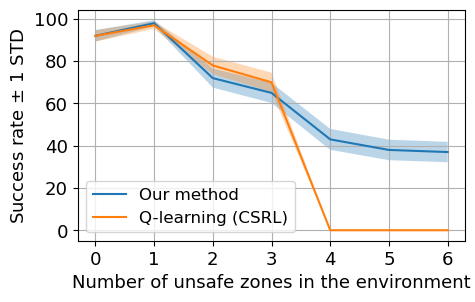

In [4]:
n_danger = range(7)

ours_stoch = [92, 98, 72, 65, 43, 38, 37]
csrl_stoch = [92, 97, 78, 70, 0, 0, 0]

ours_succes_std = []
for i in ours_stoch:
    temp = np.zeros(100)
    temp[:int(i)]=1
    std = np.sqrt(100*np.var(temp))
    ours_succes_std.append((i-std, i+std))

csrl_succes_std = []
for i in csrl_stoch:
    temp = np.zeros(100)
    temp[:int(i)]=1
    std = np.sqrt(100*np.var(temp))
    csrl_succes_std.append((i-std, i+std))

ours_succes_std = np.array(ours_succes_std)
csrl_succes_std = np.array(csrl_succes_std)

plt.figure(figsize=(5,3))
plt.fill_between(n_danger, ours_succes_std[:,0], ours_succes_std[:,1], alpha=0.3)
plt.fill_between(n_danger, csrl_succes_std[:,0], csrl_succes_std[:,1], alpha=0.3)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(n_danger, ours_stoch, label='Our method')
plt.plot(n_danger, csrl_stoch, label='Q-learning (CSRL)')
plt.xlabel("Number of unsafe zones in the environment", fontsize=13)
plt.ylabel('Success rate $\pm$ 1 STD', fontsize=13)
# plt.title("The stochastic sequential delivery environment")
# plt.xlim(50,160)
# plt.ylim(0,50)
plt.legend(loc='lower left', prop={'size': 12})
plt.grid()
plt.savefig(f"outputs/res_sequential_delivery.pdf", bbox_inches='tight')

Office world

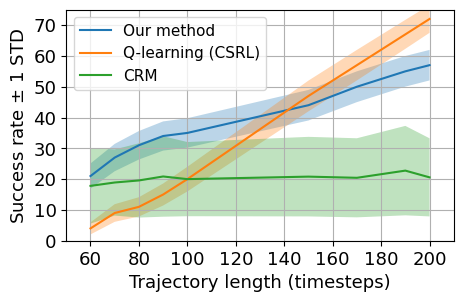

In [5]:
len_traj = [60, 70, 80, 90, 100, 150, 170, 190, 200]

ours_stoch = [21, 27, 31, 34, 35, 44, 50, 55, 57]
csrl_stoch = [4,  9,  11, 15, 20, 47, 57, 67, 72]

ours_succes_std = []
for i in ours_stoch:
    temp = np.zeros(100)
    temp[:int(i)]=1
    std = np.sqrt(100*np.var(temp))
    ours_succes_std.append((i-std, i+std))

csrl_succes_std = []
for i in csrl_stoch:
    temp = np.zeros(100)
    temp[:int(i)]=1
    std = np.sqrt(100*np.var(temp))
    csrl_succes_std.append((i-std, i+std))

qrm_succes_std = []
for i in range(len(qrm_std)):
    qrm_succes_std.append((QRM_avr[i]-qrm_std[i], QRM_avr[i]+qrm_std[i]))

ours_succes_std = np.array(ours_succes_std)
csrl_succes_std = np.array(csrl_succes_std)
qrm_succes_std = np.array(qrm_succes_std)


plt.figure(figsize=(5,3))
plt.fill_between(len_traj, ours_succes_std[:,0], ours_succes_std[:,1], alpha=0.3)
plt.fill_between(len_traj, csrl_succes_std[:,0], csrl_succes_std[:,1], alpha=0.3)
plt.fill_between(QRM_T, qrm_succes_std[:,0], qrm_succes_std[:,1], alpha=0.3)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(len_traj, ours_stoch, label='Our method')
plt.plot(len_traj, csrl_stoch, label='Q-learning (CSRL)')
plt.plot(QRM_T, QRM_avr, label='CRM')
plt.xlabel("Trajectory length (timesteps)", fontsize=13)
plt.ylabel('Success rate $\pm$ 1 STD', fontsize=13)
# plt.title("The stochastic office world")
plt.xlim(50,210)
plt.ylim(0,75)
plt.grid()
plt.legend(loc='upper left', prop={'size': 11})
plt.savefig(f"outputs/res_office_world.pdf", bbox_inches='tight')

Craft world

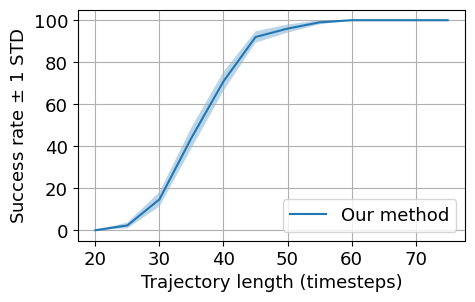

In [6]:
task_num = range(1,11)


len_traj = range(20,80,5)
ours_stoch = [0.0, 2.3, 14.7, 44.0, 70.9, 92.0, 96.0, 99.0, 100.0, 100.0, 100.0, 100.0]

ours_succes_std = []
for i in ours_stoch:
    temp = np.zeros(100)
    temp[:int(i)]=1
    std = np.sqrt(100*np.var(temp))
    ours_succes_std.append((i-std, i+std))

ours_succes_std = np.array(ours_succes_std)

plt.figure(figsize=(5,3))
plt.fill_between(len_traj, ours_succes_std[:,0], ours_succes_std[:,1], alpha=0.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(len_traj, ours_stoch, label='Our method')
plt.xlabel("Trajectory length (timesteps)", fontsize=13)
plt.ylabel('Success rate $\pm$ 1 STD', fontsize=13)
# plt.title("The ninth task in the stochastic craft-world")
# plt.xlim(50,160)
# plt.ylim(0,50)
plt.grid()
plt.legend(loc='lower right', prop={'size': 13})
plt.savefig(f"outputs/res_craftworld9.pdf", bbox_inches='tight')

In [251]:
csrl_minecraft = [

[55.0, 92.1, 99.3, 99.8, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[55.1, 92.8, 99.4, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[17.0, 69.0, 95.6, 99.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[53.4, 92.1, 98.8, 99.9, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.0, 15.4, 63.1, 91.0, 98.5, 99.6, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.0, 5.4, 47.9, 82.0, 97.0, 99.4, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.0, 0.0, 13.5, 60.4, 88.9, 97.8, 99.8, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.6, 19.1, 61.6, 90.7, 97.3, 99.7, 99.9, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.3, 17.1, 55.4, 86.4, 97.1, 99.4, 100.0, 100.0, 100.0, 100.0, 100.0]]

ours_minecraft = [
[67.1, 88.5, 93.6, 97.9, 98.4, 99.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[70.3, 82.2, 94.5, 98.8, 98.9, 99.4, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[54.1, 79.6, 94.0, 97.9, 99.2, 98.4, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[67.6, 90.8, 97.6, 98.6, 99.3, 99.6, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[6.9, 36.7, 77.0, 92.1, 97.6, 99.2, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.7, 13.2, 49.6, 78.0, 86.6, 95.8, 92.0, 98.0, 98.0, 99.0, 100.0, 100.0, 100.0],
[0.0, 5.2, 22.9, 53.2, 74.3, 89.7, 96.0, 97.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.2, 0.8, 3.6, 17.1, 48.4, 73.9, 91.0, 94.0, 100.0, 100.0, 100.0, 100.0, 100.0],
[0.0, 0.0, 2.3, 14.7, 44.0, 70.9, 92.0, 96.0, 99.0, 100.0, 100.0, 100.0, 100.0],
[0.0, 0.0, 3.1, 19.3, 41.0, 63.8, 78.0, 85.0, 89.0, 95.0, 98.0, 100.0, 100.0]
]

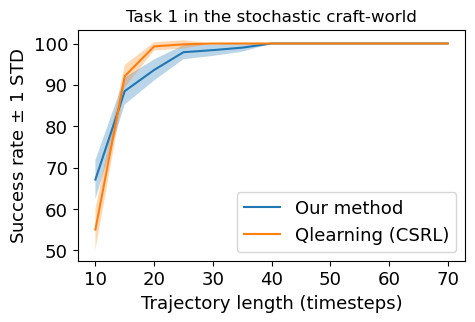

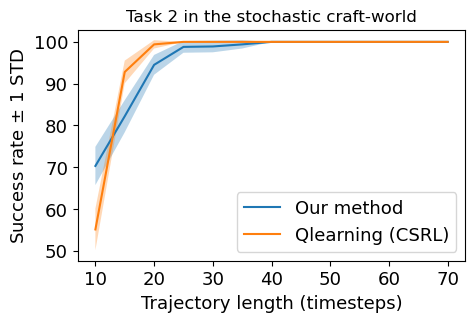

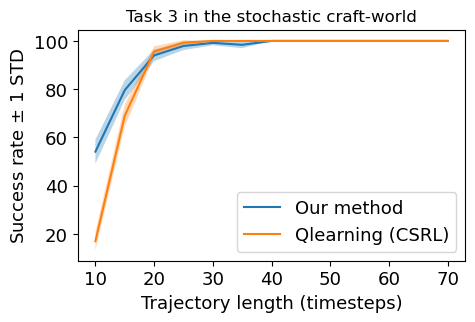

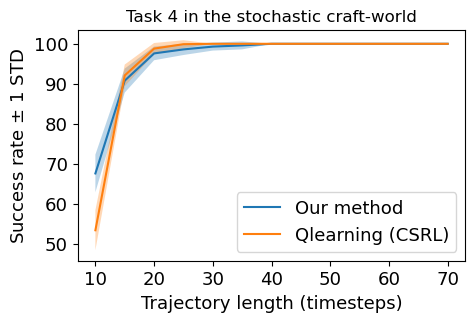

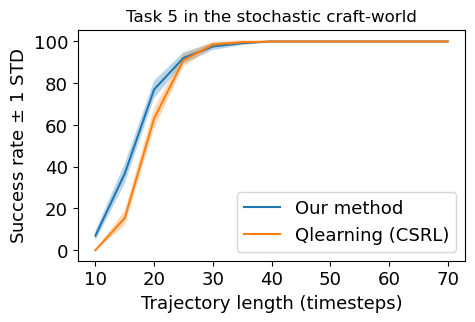

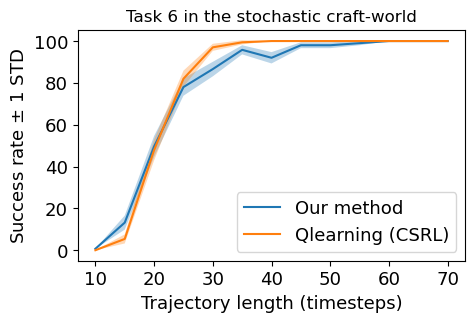

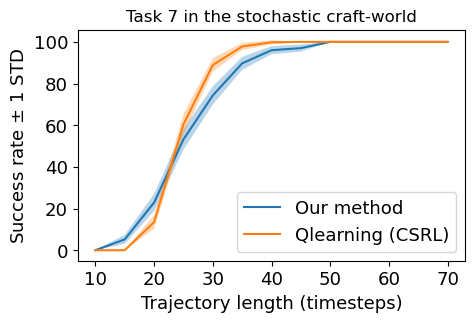

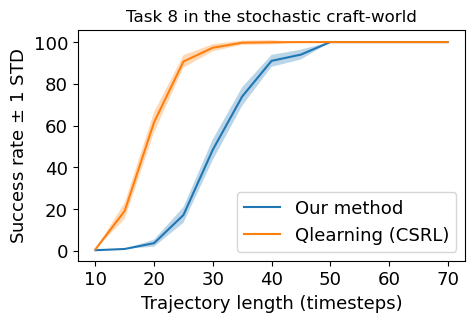

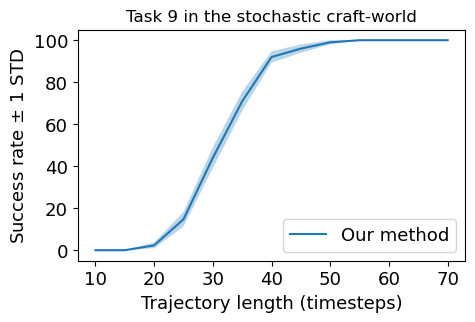

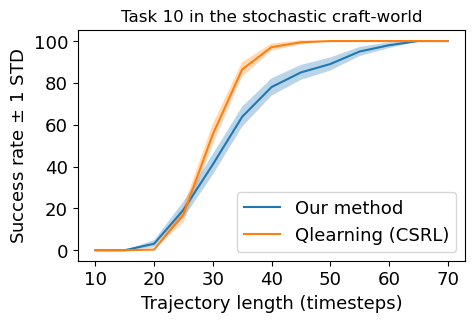

In [253]:
task_num = range(0,10)
len_traj = range(10,71,5)

for task in task_num:
    ours_stoch = ours_minecraft[task]
    csrl_stoch = csrl_minecraft[task]

    ours_succes_std = []
    for i in ours_stoch:
        temp = np.zeros(100)
        temp[:int(i)]=1
        std = np.sqrt(100*np.var(temp))
        ours_succes_std.append((i-std, i+std))

    csrl_succes_std = []
    for i in csrl_stoch:
        temp = np.zeros(100)
        temp[:int(i)]=1
        std = np.sqrt(100*np.var(temp))
        csrl_succes_std.append((i-std, i+std))

    ours_succes_std = np.array(ours_succes_std)
    csrl_succes_std = np.array(csrl_succes_std)

    plt.figure(figsize=(5,3))
    plt.fill_between(len_traj, ours_succes_std[:,0], ours_succes_std[:,1], alpha=0.3)
    plt.fill_between(len_traj, csrl_succes_std[:,0], csrl_succes_std[:,1], alpha=0.3)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.plot(len_traj, ours_stoch, label='Our method')
    if task!=8:
        plt.plot(len_traj, csrl_stoch, label='Qlearning (CSRL)')
    plt.xlabel("Trajectory length (timesteps)", fontsize=13)
    plt.ylabel('Success rate $\pm$ 1 STD', fontsize=13)
    plt.title(f"Task {task+1} in the stochastic craft-world")
    # plt.xlim(50,160)
    # plt.ylim(0,50)
    plt.legend(loc='lower right', prop={'size': 13})
    plt.savefig(f"outputs/res_craftworld{task+1}.pdf", bbox_inches='tight')

In [ ]:
d = 2
gw = grid_world(name='sequential_delivery', n_danger=d, plot=False, p=0.8)
policy = np.load(f'outputs/Ours/sequential_delivery_{n}_p{gw.p}.npy')
model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
model.load_weights(f'outputs/models/sequential_delivery_{d}_p{gw.p}')

env = RL_LTL(gw, model)
env.evaluate(verbose=2, len=50, runs=1, start=None, animation='outputs/gifs/test')

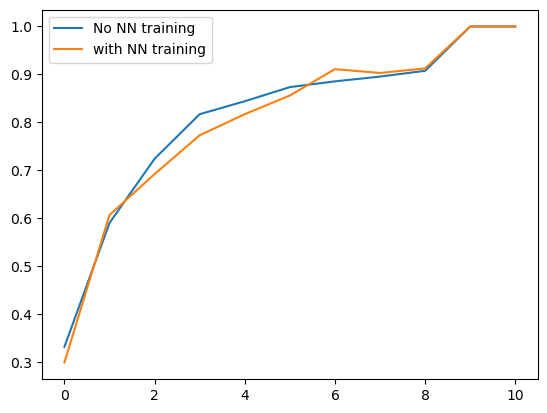

In [13]:
bf = [[0.412, 0.954, 0.82, 0.856, 0.854, 0.914, 0.922, 0.93, 1, 1, 1],
     [0, 0.0, 0.46, 0.596, 0.576, 0.58, 0.62, 0.652, 0.63, 1, 1],
     [0.424, 0.844, 0.918, 0.88, 0.946, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
     [0.49, 0.562, 0.698, 0.936, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
]
af = [
    [0.29, 0.662, 0.66, 0.766, 0.704, 0.738, 0.766, 0.724, 0.9, 1, 1],
    [0.426, 0.858, 0.944, 0.934, 1, 1, 1, 1, 0.9, 1, 1],
    [0.424, 0.526, 0.676, 0.812, 0.71, 0.744, 0.948, 0.938, 0.9, 1, 1],
    [0.056, 0.38, 0.488, 0.58, 0.854, 0.942, 0.93, 0.95, 0.95, 1, 1],
]

plt.plot(np.mean(bf, 0), label='No NN training')
plt.plot(np.mean(af, 0), label="with NN training")
plt.legend()